# Data Cleaning

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt

## Load Train Data

In [2]:
pd.set_option("display.max_columns",None) #for display all columns

In [3]:
train_data = pd.read_csv(r"N:\GUVI\Smart_Premium\Dataset\train.csv")
train_data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
# convert id to index
train_data.set_index("id",inplace=True)

# Drop unnecessary columns
train_data.drop(["Customer Feedback","Policy Start Date"], axis=1,inplace=True)

## Check Spelling Mistakes

In [6]:
for i in train_data.select_dtypes(include="object").columns:
    print(i)
    print(train_data[i].unique(),"\n")

Gender
['Female' 'Male'] 

Marital Status
['Married' 'Divorced' 'Single' nan] 

Education Level
["Bachelor's" "Master's" 'High School' 'PhD'] 

Occupation
['Self-Employed' nan 'Employed' 'Unemployed'] 

Location
['Urban' 'Rural' 'Suburban'] 

Policy Type
['Premium' 'Comprehensive' 'Basic'] 

Smoking Status
['No' 'Yes'] 

Exercise Frequency
['Weekly' 'Monthly' 'Daily' 'Rarely'] 

Property Type
['House' 'Apartment' 'Condo'] 



## Handle Missing Values

In [7]:
#----------Handle Missing Values------------------ 
#● Missing values in numerical features can be replaced with the median value. 
#● Missing values in categorical features can be replaced with the most frequent value (mode).

In [8]:
for i in train_data.columns:
    if train_data[i].isnull().sum() != 0:
        print(i,"------",train_data[i].isnull().sum())

Age ------ 18705
Annual Income ------ 44949
Marital Status ------ 18529
Number of Dependents ------ 109672
Occupation ------ 358075
Health Score ------ 74076
Previous Claims ------ 364029
Vehicle Age ------ 6
Credit Score ------ 137882
Insurance Duration ------ 1


In [9]:
# --- Numeric columns (fill missing with median) ---
num_cols = [
    "Age", "Annual Income", "Number of Dependents",
    "Health Score", "Previous Claims", "Vehicle Age",
    "Insurance Duration", "Credit Score"
]
imp_median = SimpleImputer(strategy="median")
train_data[num_cols] = imp_median.fit_transform(train_data[num_cols])

# --- Categorical columns (fill missing with mode / most frequent) ---
cat_cols = ["Marital Status", "Occupation"]
imp_mode = SimpleImputer(strategy="most_frequent")
train_data[cat_cols] = imp_mode.fit_transform(train_data[cat_cols])

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  object 
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  object 
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Smoking Status        1200000 non-null 

In [11]:
train_data.nunique()

Age                         47
Gender                       2
Annual Income            88593
Marital Status               3
Number of Dependents         5
Education Level              4
Occupation                   3
Health Score            532658
Location                     3
Policy Type                  3
Previous Claims             10
Vehicle Age                 20
Credit Score               550
Insurance Duration           9
Smoking Status               2
Exercise Frequency           4
Property Type                3
Premium Amount            4794
dtype: int64

# Data Preprocessing

## Encoding Object Columns

In [12]:
enc_cols = [col for col in train_data.columns if train_data[col].dtype == "object"]
enc_cols

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [13]:
# --- Dictionary to store encoders ---
encoders = {}

# --- Fit and transform each categorical column ---
for col in enc_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    encoders[col] = le  # save the fitted encoder

In [14]:
train_data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,0,3,2,2869.0
1,39.0,0,31678.0,0,3.0,2,0,15.569731,0,1,1.0,12.0,694.0,2.0,1,1,2,1483.0
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,595.0,3.0,1,3,2,567.0
3,21.0,1,141855.0,1,2.0,0,0,10.938144,0,0,1.0,0.0,367.0,1.0,1,0,0,765.0
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,1,3,2,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,27316.0,1,0.0,2,2,13.772907,2,2,1.0,5.0,372.0,3.0,0,0,0,1303.0
1199996,54.0,1,35786.0,0,2.0,2,1,11.483482,0,1,1.0,10.0,597.0,4.0,0,3,0,821.0
1199997,19.0,1,51884.0,0,0.0,2,0,14.724469,1,0,0.0,19.0,595.0,6.0,0,1,1,371.0


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  int64  
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  int64  
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  int64  
 6   Occupation            1200000 non-null  int64  
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  int64  
 9   Policy Type           1200000 non-null  int64  
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Smoking Status        1200000 non-null 

## Correalation and Hypothesis Tests

In [16]:
#---correlation test---
train_data.corr()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
Age,1.000000,0.000215,0.000061,0.000225,0.001399,-0.000416,0.001394,0.000813,0.001861,-0.000407,0.001544,-0.002436,0.002661,-0.000062,-0.000628,0.000421,-0.001176,-0.002410
Gender,0.000215,1.000000,-0.000983,0.001285,0.000833,0.000558,0.000472,0.003412,0.001225,-0.001539,-0.000229,0.000949,0.000756,0.000266,0.003187,-0.000568,-0.000994,0.000161
Annual Income,0.000061,-0.000983,1.000000,0.004035,0.001920,0.000257,0.003371,0.023301,0.000434,-0.000843,0.034777,-0.000438,-0.181180,0.000383,-0.001492,0.001439,-0.000462,-0.009989
Marital Status,0.000225,0.001285,0.004035,1.000000,-0.000658,-0.000986,0.002385,0.001610,0.000519,0.000155,0.000242,0.001132,-0.002786,-0.000510,-0.000266,-0.000247,-0.003362,0.003021
Number of Dependents,0.001399,0.000833,0.001920,-0.000658,1.000000,0.000340,-0.001255,0.004831,-0.000347,-0.001181,-0.003277,0.001170,-0.001525,-0.000252,0.000598,-0.000471,0.002104,-0.000947
Education Level,-0.000416,0.000558,0.000257,-0.000986,0.000340,1.000000,0.000596,0.001360,0.002941,0.001344,0.000245,0.000743,-0.002020,0.000575,0.000424,0.001498,0.001245,-0.001121
Occupation,0.001394,0.000472,0.003371,0.002385,-0.001255,0.000596,1.000000,0.002396,0.001271,-0.000507,0.002132,0.000984,-0.004570,0.001421,-0.000701,-0.001754,-0.003419,0.003185
Health Score,0.000813,0.003412,0.023301,0.001610,0.004831,0.001360,0.002396,1.000000,-0.002067,-0.002296,0.001779,0.000237,0.009947,0.002374,-0.002050,-0.000748,-0.001030,0.013976
Location,0.001861,0.001225,0.000434,0.000519,-0.000347,0.002941,0.001271,-0.002067,1.000000,0.000331,-0.000860,-0.000009,-0.000547,0.001933,0.001860,0.000528,-0.000434,0.001059
Policy Type,-0.000407,-0.001539,-0.000843,0.000155,-0.001181,0.001344,-0.000507,-0.002296,0.000331,1.000000,-0.002091,0.001127,-0.001056,-0.000979,-0.001745,0.002895,-0.001287,-0.000884


In [17]:
#according to correlation test every column have weakest relation between other columns so next move on hypothesis test.

#---Hyothesis test---
#separate continuous and category columns
continuous = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims',
              'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']
category = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type',
            'Smoking Status', 'Exercise Frequency', 'Property Type']

In [18]:
#continuous vs coutinuous
def two_sample_test(c1,c2):
    t = f= 0
    for i in range(31):
        sample1 = c1.sample(frac=0.03)
        sample2 = c2.sample(frac=0.03)
        t_test, p_value = stats.ttest_ind(sample1,sample2)
        if p_value < 0.05:
            f+=1
        else:
            t+=1
    if t>f:
        return True
    else:
        return False
    
#catergory vs category
def chisquare_test(c1,c2):
    return True if stats.chi2_contingency(pd.crosstab(c1,c2))[1] < 0.05 else False

#continuous(c1) vs category(c2)
def annova_test(c1,c2):
    group = train_data[c2].unique()
    data = {}
    for i in group:
        data[i] = train_data[c1][train_data[c2] == i]
    f_value, p_value = stats.f_oneway(*[i for i in data.values()])
    return True if p_value > 0.05 else False

In [19]:
final = {}
for i in train_data.columns:
    final[i] = {}
    for j in train_data.columns:
        if (i in continuous) and (j in continuous):
            result = two_sample_test(train_data[i], train_data[j])
        elif (i in category) and (j in category):
            result = chisquare_test(train_data[i], train_data[j])
        elif (i in continuous) and (j in category):
            result = annova_test(i,j)
        elif (i in category) and (j in continuous):
            result = annova_test(j,i)
        if result:
            final[i][j] = 1
        else:
            final[i][j] = 0

In [20]:
final_df = pd.DataFrame(final)
final_df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type,Premium Amount
Age,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,1,0
Gender,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1
Annual Income,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
Marital Status,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0
Number of Dependents,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0
Education Level,1,0,0,0,1,1,0,0,1,1,1,1,0,1,0,1,1,1
Occupation,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0
Health Score,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
Location,0,0,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,1
Policy Type,1,0,1,0,1,1,0,0,0,1,0,1,1,1,0,1,0,1


<Axes: >

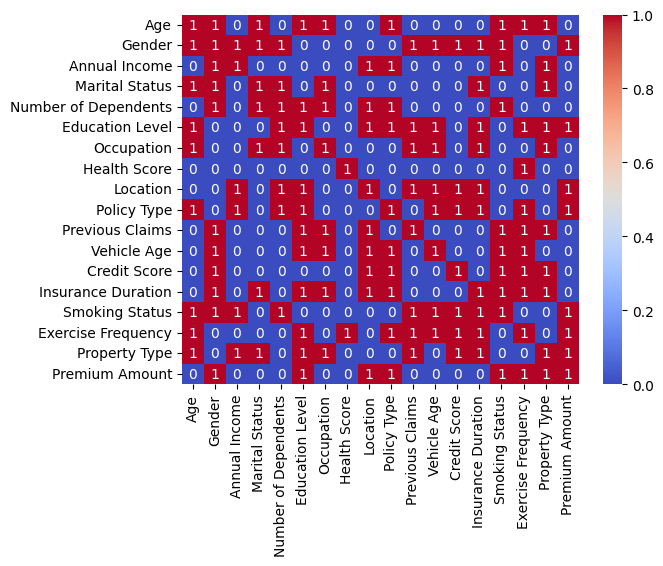

In [21]:
sns.heatmap(final_df, annot= True, cmap= "coolwarm")

according to hypothesis test we can't remove any columns, next move to test skewness and kutosis

## Skewness and Kurtosis

In [22]:
#Split data into independent and dependent
x = train_data.drop("Premium Amount",axis=1)
y = train_data["Premium Amount"]
x

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,0,3,2
1,39.0,0,31678.0,0,3.0,2,0,15.569731,0,1,1.0,12.0,694.0,2.0,1,1,2
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,595.0,3.0,1,3,2
3,21.0,1,141855.0,1,2.0,0,0,10.938144,0,0,1.0,0.0,367.0,1.0,1,0,0
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,27316.0,1,0.0,2,2,13.772907,2,2,1.0,5.0,372.0,3.0,0,0,0
1199996,54.0,1,35786.0,0,2.0,2,1,11.483482,0,1,1.0,10.0,597.0,4.0,0,3,0
1199997,19.0,1,51884.0,0,0.0,2,0,14.724469,1,0,0.0,19.0,595.0,6.0,0,1,1


In [23]:
y

id
0          2869.0
1          1483.0
2           567.0
3           765.0
4          2022.0
            ...  
1199995    1303.0
1199996     821.0
1199997     371.0
1199998     596.0
1199999    2480.0
Name: Premium Amount, Length: 1200000, dtype: float64

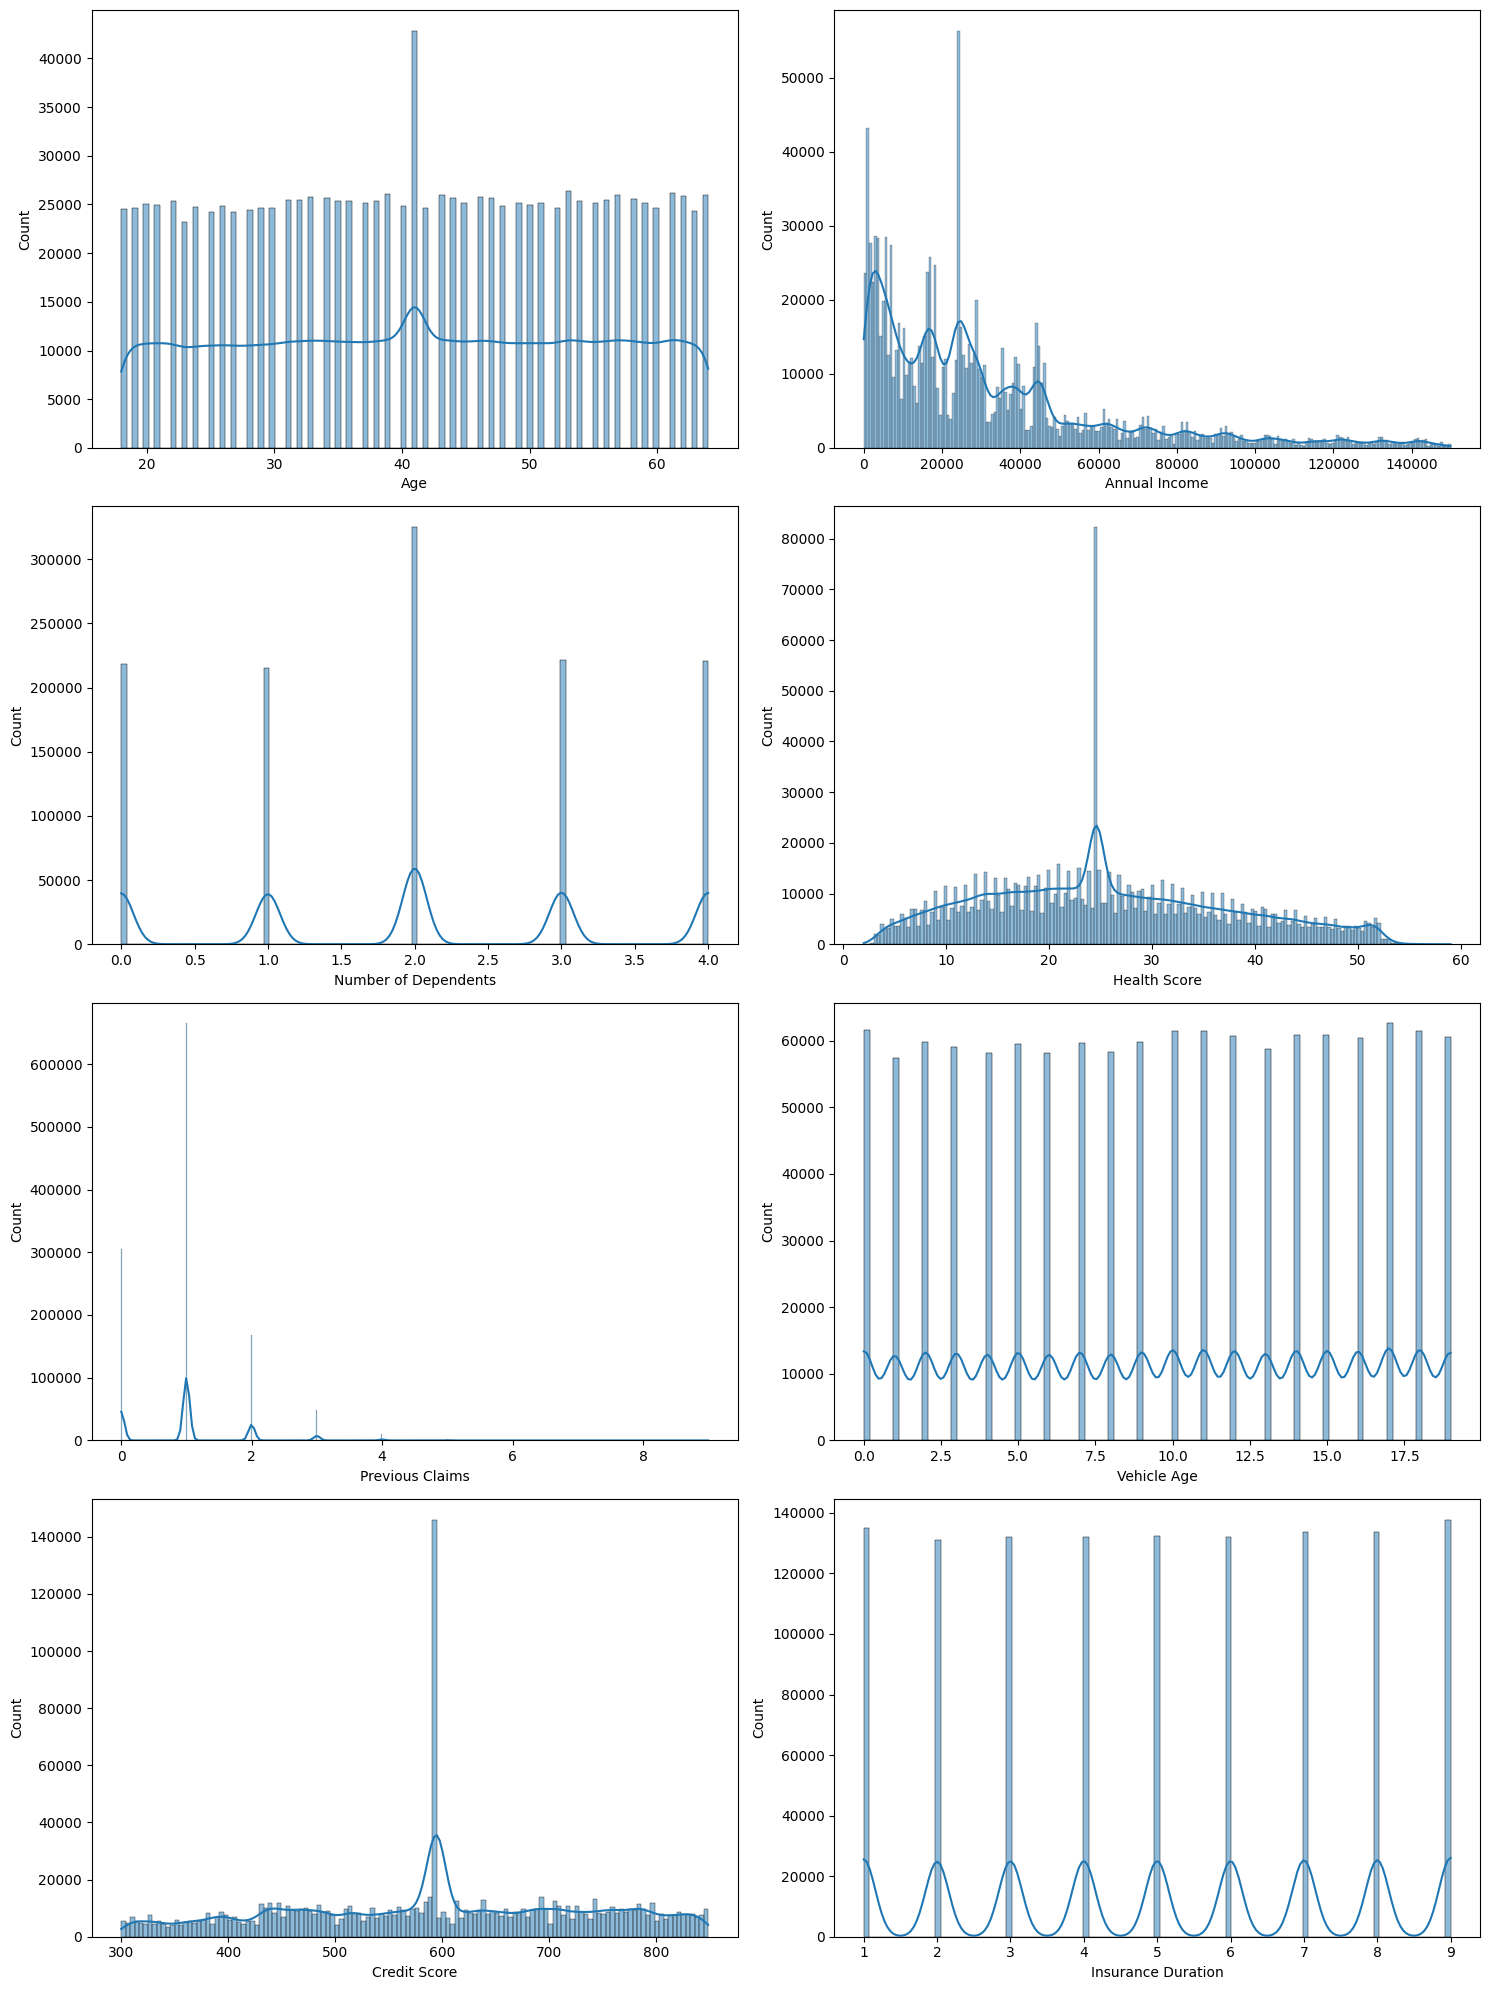

In [24]:
# Select numeric columns
con_col = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
cols = con_col

# Grid size (example: 2 plots per row)
ncols = 2
nrows = (len(cols) + ncols - 1) // ncols  

# Create figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols):
    sns.histplot(x[col], kde=True, ax=axes[i])

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [25]:
for i in con_col:
    print(i)
    boxcox_method = [1,-1,0,0.5,-0.5,2,-2]
    for j in boxcox_method:
        print("Method:",j," Skewness:",(pd.DataFrame(stats.boxcox(x[i], lmbda=j))).skew().values,
                "Kurtosis:",(pd.DataFrame(stats.boxcox(x[i], lmbda=j))).kurtosis().values)

Age
Method: 1  Skewness: [-0.01212404] Kurtosis: [-1.1663719]
Method: -1  Skewness: [-0.98044876] Kurtosis: [0.00226787]
Method: 0  Skewness: [-0.47392386] Kurtosis: [-0.86200433]
Method: 0.5  Skewness: [-0.23565432] Kurtosis: [-1.07696252]
Method: -0.5  Skewness: [-0.72368034] Kurtosis: [-0.50493758]
Method: 2  Skewness: [0.38516496] Kurtosis: [-1.05368128]
Method: -2  Skewness: [-1.49505585] Kurtosis: [1.4460548]
Annual Income
Method: 1  Skewness: [1.52295375] Kurtosis: [2.0168912]
Method: -1  Skewness: [-113.46016402] Kurtosis: [30085.74576986]
Method: 0  Skewness: [-1.04955485] Kurtosis: [1.45537946]
Method: 0.5  Skewness: [0.49718492] Kurtosis: [-0.25847362]
Method: -0.5  Skewness: [-9.85489349] Kurtosis: [202.19241183]
Method: 2  Skewness: [2.93478832] Kurtosis: [8.94496845]
Method: -2  Skewness: [-663.46841922] Kurtosis: [546617.58773856]
Number of Dependents
Method: 1  Skewness: [-0.01188922] Kurtosis: [-1.1359676]


n:\GUVI\Smart_Premium\.venv\lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
n:\GUVI\Smart_Premium\.venv\lib\site-packages\pandas\core\nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Method: -1  Skewness: [nan] Kurtosis: [nan]
Method: 0  Skewness: [nan] Kurtosis: [nan]
Method: 0.5  Skewness: [-0.85614557] Kurtosis: [-0.45762328]
Method: -0.5  Skewness: [nan] Kurtosis: [nan]
Method: 2  Skewness: [0.75903749] Kurtosis: [-0.79282595]
Method: -2  Skewness: [nan] Kurtosis: [nan]
Health Score
Method: 1  Skewness: [0.30730213] Kurtosis: [-0.63489537]
Method: -1  Skewness: [-2.88779231] Kurtosis: [11.0912381]
Method: 0  Skewness: [-0.87538283] Kurtosis: [0.58070488]
Method: 0.5  Skewness: [-0.21294394] Kurtosis: [-0.53487501]
Method: -0.5  Skewness: [-1.74567615] Kurtosis: [3.79878947]
Method: 2  Skewness: [1.08847307] Kurtosis: [0.43756724]
Method: -2  Skewness: [-6.06915833] Kurtosis: [52.33213687]
Previous Claims
Method: 1  Skewness: [1.08764896] Kurtosis: [2.3730319]
Method: -1  Skewness: [nan] Kurtosis: [nan]
Method: 0  Skewness: [nan] Kurtosis: [nan]
Method: 0.5  Skewness: [-0.49934643] Kurtosis: [-0.66336571]
Method: -0.5  Skewness: [nan] Kurtosis: [nan]
Method: 2  

In [26]:
#apply suitable boxcox method for skew, kurtosis columns
# Annual Income 0.5
x["Annual Income"] = stats.boxcox(x["Annual Income"],lmbda=0.5)

<Axes: xlabel='Annual Income', ylabel='Count'>

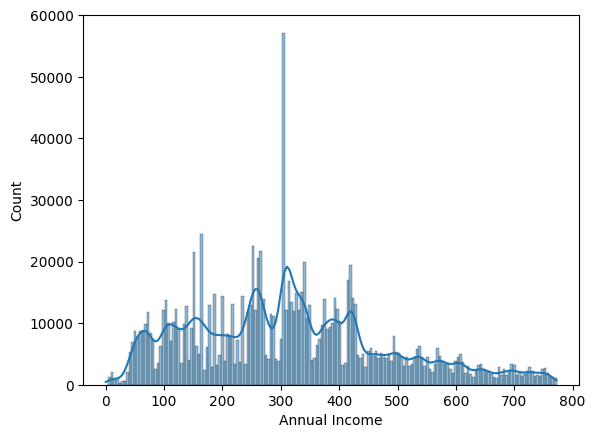

In [27]:
sns.histplot(x["Annual Income"],kde=True)

In [28]:
x

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,
0,19.0,0,198.489401,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,0,3,2
1,39.0,0,353.966291,0,3.0,2,0,15.569731,0,1,1.0,12.0,694.0,2.0,1,1,2
2,23.0,1,318.012500,0,3.0,1,1,47.177549,1,2,1.0,14.0,595.0,3.0,1,3,2
3,21.0,1,751.272859,1,2.0,0,0,10.938144,0,0,1.0,0.0,367.0,1.0,1,0,0
4,21.0,1,396.251177,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,328.551055,1,0.0,2,2,13.772907,2,2,1.0,5.0,372.0,3.0,0,0,0
1199996,54.0,1,376.343759,0,2.0,2,1,11.483482,0,1,1.0,10.0,597.0,4.0,0,3,0
1199997,19.0,1,453.561192,0,0.0,2,0,14.724469,1,0,0.0,19.0,595.0,6.0,0,1,1


## StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[-1.64830057e+00, -1.00429422e+00, -6.96263059e-01, ...,
        -1.00312655e+00,  1.32826067e+00,  1.22411616e+00],
       [-1.59542341e-01, -1.00429422e+00,  2.24613083e-01, ...,
         9.96883191e-01, -4.59846873e-01,  1.22411616e+00],
       [-1.35054892e+00,  9.95724141e-01,  1.16618955e-02, ...,
         9.96883191e-01,  1.32826067e+00,  1.22411616e+00],
       ...,
       [-1.64830057e+00,  9.95724141e-01,  8.14505055e-01, ...,
        -1.00312655e+00, -4.59846873e-01, -3.78572954e-04],
       [ 1.03146424e+00,  9.95724141e-01, -5.20026600e-02, ...,
        -1.00312655e+00, -1.35390065e+00, -1.22487330e+00],
       [-1.49942475e+00, -1.00429422e+00, -5.20026600e-02, ...,
         9.96883191e-01, -4.59846873e-01,  1.22411616e+00]],
      shape=(1200000, 17))

In [30]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type
0,-1.648301,-1.004294,-0.696263,-0.022539,-0.746862,-1.341311,0.370245,-0.249610,1.229445,1.221087,1.216739,1.286338,-1.567375,-0.007023,-1.003127,1.328261,1.224116
1,-0.159542,-1.004294,0.224613,-1.243266,0.733500,0.439586,-0.849355,-0.844110,-1.222424,-0.003359,-0.002284,0.420713,0.714630,-1.163391,0.996883,-0.459847,1.224116
2,-1.350549,0.995724,0.011662,-1.243266,0.733500,-0.450862,0.370245,1.829212,0.003510,1.221087,-0.002284,0.766963,0.013020,-0.777935,0.996883,1.328261,1.224116
3,-1.499425,0.995724,2.577825,-0.022539,-0.006681,-1.341311,-0.849355,-1.235840,-1.222424,-1.227805,-0.002284,-1.656788,-1.602810,-1.548847,0.996883,-1.353901,-1.224873
4,-1.499425,0.995724,0.475063,1.198188,-0.746862,-1.341311,0.370245,-0.437598,-1.222424,1.221087,-1.221307,-0.271787,0.034281,-0.392479,0.996883,1.328261,1.224116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.382856,-1.004294,0.074081,-0.022539,-1.487043,0.439586,1.589846,-0.996082,1.229445,1.221087,-0.002284,-0.791163,-1.567375,-0.777935,-1.003127,-1.353901,-1.224873
1199996,0.957026,0.995724,0.357153,-1.243266,-0.006681,0.439586,0.370245,-1.189716,-1.222424,-0.003359,-0.002284,0.074463,0.027194,-0.392479,-1.003127,1.328261,-1.224873
1199997,-1.648301,0.995724,0.814505,-1.243266,-1.487043,0.439586,-0.849355,-0.915601,0.003510,-1.227805,-1.221307,1.632588,0.013020,0.378433,-1.003127,-0.459847,-0.000379
1199998,1.031464,0.995724,-0.052003,1.198188,-0.746862,1.330035,-0.849355,-0.592267,0.003510,1.221087,-0.002284,-0.444912,-1.319331,-0.392479,-1.003127,-1.353901,-1.224873


# Model Development

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((960000, 17), (240000, 17), (960000,), (240000,))

In [32]:
from sklearn.linear_model import LinearRegression
le = LinearRegression().fit(x_train,y_train)
y_pred = le.predict(x_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2 :", r2_score(y_test,y_pred))

MAE: 667.5577106821214
MSE: 746763.3310562267
R2 : 0.003341337882737938


In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2 :", r2_score(y_test,y_pred))

MAE: 903.8248041666667
MSE: 1538725.8182125
R2 : -1.0536418321127905


In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2 :", r2_score(y_test,y_pred))

MAE: 646.2277517973899
MSE: 719990.2093422873
R2 : 0.039073761474528346


In [35]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor().fit(x_train,y_train)
y_pred = ada.predict(x_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2 :", r2_score(y_test,y_pred))

MAE: 769.4560784578172
MSE: 843410.9261681945
R2 : -0.1256482078477712


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2 :", r2_score(y_test,y_pred))

MAE: 663.0741411666668
MSE: 736781.2441088208
R2 : 0.01666380968657999
